# Loading Packages

Justine Huynh （黄家琪）
November 12, 2020
二零二零年十一月十二日星期四

In [208]:
# Data Management/Investigation
import pandas as pd
import numpy as np
import missingno as miss
from plotnine import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTree
from sklearn import tree # For plotting the decision tree rules
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn.ensemble import RandomForestRegressor as RF # random bagging and random sampling

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
# Bring all these things; pre-pocessing, tuning, etc
from sklearn.pipeline import Pipeline


from itertools import chain

# Manipulating, Pre-Processesing Data

In [10]:
trainData = pd.read_csv("../train_data.csv")
testData = pd.read_csv("../test_data.csv")

# Use descibe() method to see summary stats..
trainData.describe()

,OBJECTID,BATHRM,HF_BATHRM,HEAT,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,LN_PRICE
count,43590.000000,43589.000000,43588.000000,43589.000000,43589.000000,43579.000000,43586.000000,43586.000000,25007.000000,43590.000000,...,43589.000000,43589.000000,43589.000000,43589.000000,43589.000000,43588.000000,43589.000000,43590.000000,43590.000000,43590.000000
mean,52159.470452,2.203331,0.649697,6.853954,1.220675,7.424815,3.428073,1931.199422,2004.274683,1969.804313,...,4.297116,3.706348,13.467756,3.960839,6.302049,1.250551,0.639014,13.268640,3175.001078,12.927904
std,31134.869767,1.068895,0.608786,5.151037,0.624555,2.334643,1.163447,86.229606,17.783975,16.926513,...,1.373435,0.746981,4.045380,3.334032,2.098208,0.669050,0.905193,4.170675,3200.666743,0.865822
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1900.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000
25%,24534.250000,1.000000,0.000000,1.000000,1.000000,6.000000,3.000000,1913.000000,2002.000000,1957.000000,...,3.000000,3.000000,14.000000,1.000000,6.000000,1.000000,0.000000,11.000000,1520.000000,12.388394
50%,51708.000000,2.000000,1.000000,7.000000,1.000000,7.000000,3.000000,1929.000000,2008.000000,1967.000000,...,4.000000,4.000000,14.000000,2.000000,6.000000,1.000000,0.000000,12.000000,2212.000000,12.994530
75%,79542.750000,3.000000,1.000000,13.000000,1.000000,8.000000,4.000000,1947.000000,2013.000000,1975.000000,...,5.000000,4.000000,14.000000,6.000000,6.000000,1.000000,1.000000,13.000000,4000.000000,13.527828
max,107154.000000,24.000000,11.000000,13.000000,6.000000,36.000000,54.000000,2018.000000,2019.000000,2018.000000,...,12.000000,6.000000,24.000000,15.000000,11.000000,44.000000,13.000000,39.000000,187301.000000,17.038378


In [12]:
testData.describe()

,OBJECTID,BATHRM,HF_BATHRM,HEAT,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,LN_PRICE
count,14531.000000,14531.000000,14531.000000,14531.000000,14531.000000,14529.000000,14531.000000,14530.000000,8329.000000,14531.000000,...,14531.000000,14531.000000,14531.000000,14531.000000,14531.000000,14531.000000,14530.000000,14531.000000,14531.000000,14531.000000
mean,51768.544629,2.206111,0.648889,6.828642,1.224279,7.443389,3.432661,1932.333035,2004.221635,1969.753905,...,4.305691,3.713509,13.386140,3.969858,6.282293,1.254009,0.647419,13.305829,3160.782121,12.928596
std,31289.344982,1.063170,0.602508,5.146761,0.626116,2.474703,1.301036,72.896276,12.540362,16.957134,...,1.378233,0.746653,3.996216,3.326620,2.079362,0.640858,0.923188,4.203454,2972.437611,0.859964
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1910.000000,1915.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,2.302585
25%,23853.500000,1.000000,0.000000,1.000000,1.000000,6.000000,3.000000,1913.000000,2002.000000,1957.000000,...,3.000000,3.000000,14.000000,1.000000,6.000000,1.000000,0.000000,11.000000,1520.500000,12.388394
50%,50861.000000,2.000000,1.000000,7.000000,1.000000,7.000000,3.000000,1929.000000,2007.000000,1967.000000,...,4.000000,4.000000,14.000000,2.000000,6.000000,1.000000,0.000000,12.000000,2229.000000,12.988832
75%,79493.000000,3.000000,1.000000,13.000000,1.000000,8.000000,4.000000,1947.000000,2012.000000,1975.000000,...,5.000000,4.000000,14.000000,6.000000,6.000000,1.000000,1.000000,13.000000,4000.000000,13.527828
max,107127.000000,10.000000,5.000000,13.000000,5.000000,101.000000,53.000000,2018.000000,2018.000000,2018.000000,...,12.000000,6.000000,24.000000,15.000000,11.000000,6.000000,13.000000,24.000000,102340.000000,16.991908


In [14]:
testData.shape

(14531, 39)

In [15]:
trainData.shape

(43590, 39)

We are actually trying to predict the ln(Price), not the actual raw price.

So anyways, if 

$ln(Price) = 0$, 

then $Price = e^0 = 1$

In [17]:
# Drop all observations where the outcome is missing 
#dat = dat[~dat.PRICE.isna()]
trainData = trainData[~trainData.LN_PRICE.isna()]
testData = testData[~testData.LN_PRICE.isna()]
# Only houses that are sold
#dat = dat[dat.PRICE > 0]
#trainData = trainData[trainData.LN_PRICE]

<AxesSubplot:>

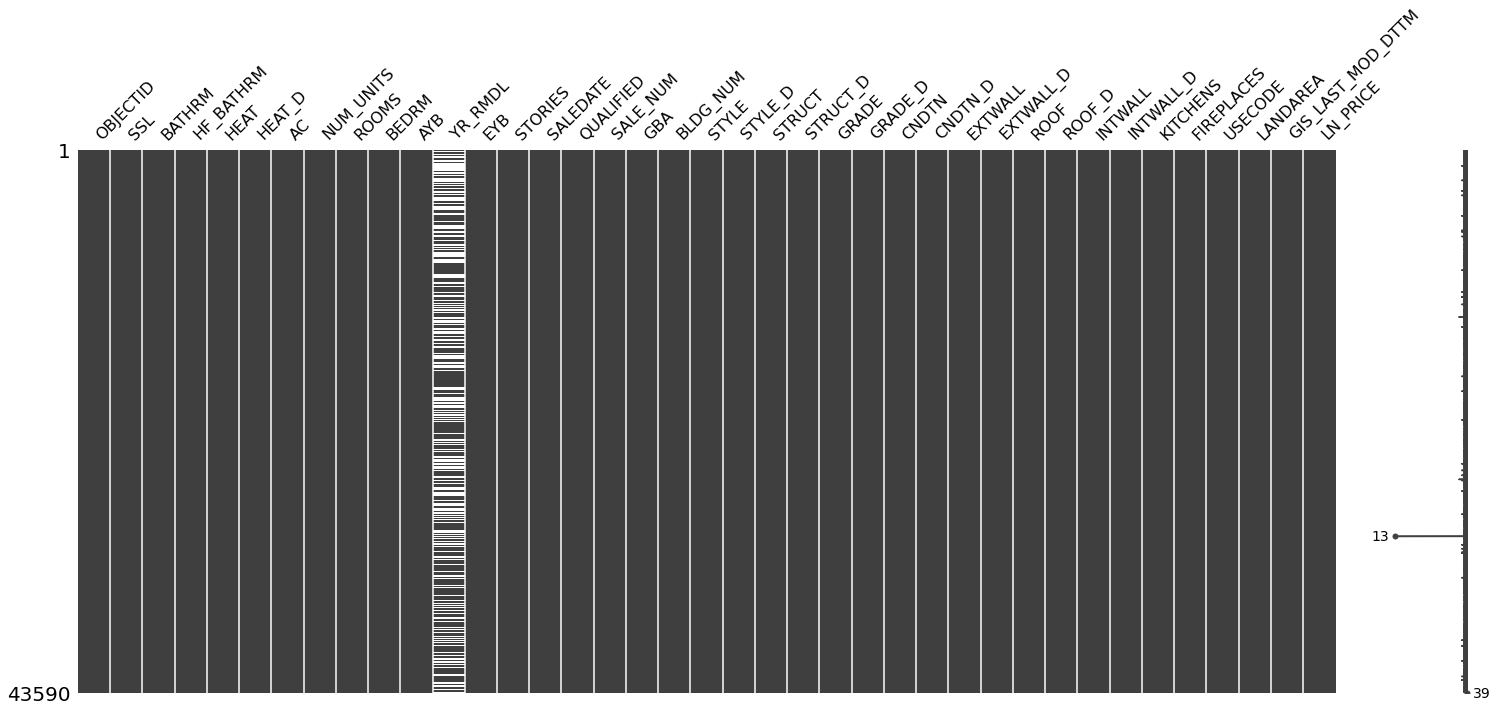

In [18]:
miss.matrix(trainData)

<AxesSubplot:>

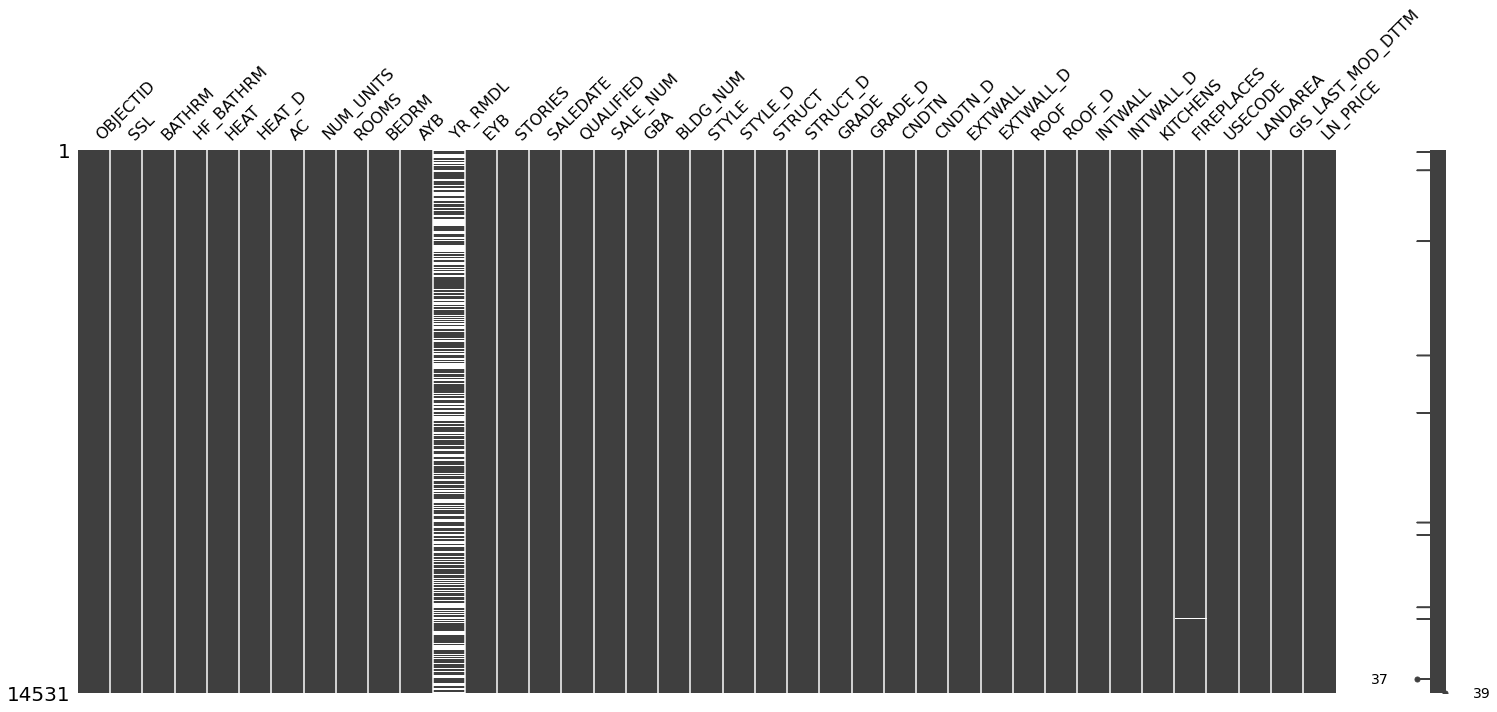

In [19]:
miss.matrix(testData)

So it looks like year_remodel is sparse.

In [84]:
#trainX = trainData[~]
# Let's grab 8 variables
trainX = trainData[["BATHRM", "HF_BATHRM", "NUM_UNITS", "ROOMS", "BEDRM", "GRADE", "CNDTN", "LANDAREA"]]
testX = testData[["BATHRM", "HF_BATHRM", "NUM_UNITS", "ROOMS", "BEDRM", "GRADE", "CNDTN", "LANDAREA"]]
trainY= trainData[["LN_PRICE"]]
testY = testData[["LN_PRICE"]]
#trainX.drop(["OBJECTID", "YR_RMDL", "GRADE_D", "CNDTN_D", "EXTWALL_D"], axis=1)

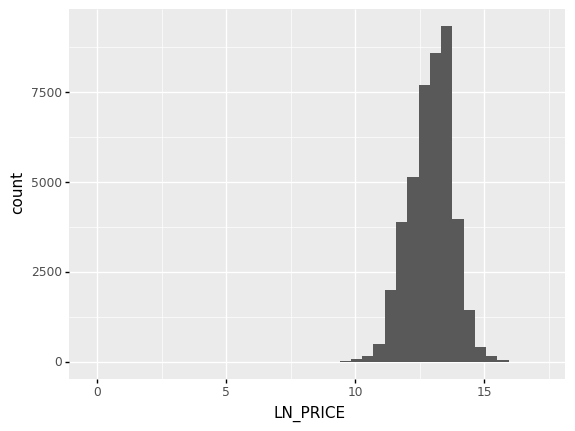

<ggplot: (132633653101)>

In [46]:
(
    trainData >>
    ggplot() +
    geom_histogram(aes(x = "LN_PRICE"), bins = 40)
)

### Any NAs?

In [123]:
print("Train X")
print(trainX.isna().sum())
print("Test X")
print(testX.isna().sum())
print("Train Y")
print(trainY.isna().sum())
print("Test Y")
print(testY.isna().sum())

Train X
BATHRM       0
HF_BATHRM    0
NUM_UNITS    0
ROOMS        0
BEDRM        0
GRADE        0
CNDTN        0
LANDAREA     0
dtype: int64
Test X
BATHRM       0
HF_BATHRM    0
NUM_UNITS    0
ROOMS        2
BEDRM        0
GRADE        0
CNDTN        0
LANDAREA     0
dtype: int64
Train Y
LN_PRICE    0
dtype: int64
Test Y
LN_PRICE    0
dtype: int64


### Replacing All NAs with mean values

In [125]:
# Let's deal with NAs..

#meanBATHRM = trainX["BATHRM"].mean()
# Replace NaNs in column S2 with the
# mean of values in the same column
#trainX["BATHRM"].fillna(value= trainX["BATHRM"].mean(), inplace=True)
trainX = trainX.apply(lambda x: x.fillna(value = x.mean()))
testX = testX.apply(lambda x: x.fillna(value = x.mean()))
# and do the same for testX

BATHRM       0
HF_BATHRM    0
NUM_UNITS    0
ROOMS        0
BEDRM        0
GRADE        0
CNDTN        0
LANDAREA     0
dtype: int64

In [126]:
# Let's standardize
# Let's 
scaler = pp.MinMaxScaler()
colNames = list(trainX)
trainX = scaler.fit_transform(trainX)
trainX # now it's scaled, in a numpy array

array([[0.125     , 0.09090909, 0.16666667, ..., 0.41666667, 0.83333333,
        0.01192733],
       [0.08333333, 0.09090909, 0.16666667, ..., 0.5       , 0.83333333,
        0.02055515],
       [0.08333333, 0.18181818, 0.16666667, ..., 0.5       , 0.5       ,
        0.04199657],
       ...,
       [0.08333333, 0.        , 0.16666667, ..., 0.33333333, 0.66666667,
        0.00743723],
       [0.125     , 0.09090909, 0.16666667, ..., 0.33333333, 0.66666667,
        0.00468764],
       [0.08333333, 0.09090909, 0.33333333, ..., 0.41666667, 0.66666667,
        0.00597968]])

In [127]:
# Convert back into data frame
trainX = pd.DataFrame(trainX, columns=colNames)
trainX

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,GRADE,CNDTN,LANDAREA
0,0.125000,0.090909,0.166667,0.250000,0.074074,0.416667,0.833333,0.011927
1,0.083333,0.090909,0.166667,0.194444,0.055556,0.500000,0.833333,0.020555
2,0.083333,0.181818,0.166667,0.250000,0.074074,0.500000,0.500000,0.041997
3,0.041667,0.090909,0.166667,0.166667,0.055556,0.250000,0.500000,0.014624
4,0.083333,0.000000,0.166667,0.305556,0.074074,0.416667,0.500000,0.011196
...,...,...,...,...,...,...,...,...
43585,0.041667,0.000000,0.166667,0.138889,0.037037,0.333333,0.500000,0.002990
43586,0.083333,0.090909,0.166667,0.194444,0.055556,0.416667,0.666667,0.007918
43587,0.083333,0.000000,0.166667,0.250000,0.074074,0.333333,0.666667,0.007437
43588,0.125000,0.090909,0.166667,0.166667,0.055556,0.333333,0.666667,0.004688


# Modeling

We are using continuous variables. Let's use K-folds cross-validation, for k = 5 folds. 

We will also use **mean squared error** for our performance results

In [128]:
fold_generator = KFold(n_splits = 5, shuffle = True, random_state=111)
# Train on the exact same fold
# Kfold makes a generator object that we can use again and again.
# We want to use the same splits, except for the algorithm
use_metrics = ["neg_mean_squared_error"] # times it by -1

# Linear Model

In [129]:
lm_scores = cross_validate(LM(), trainX, trainY, cv = fold_generator, scoring =use_metrics)
lm_scores

{'fit_time': array([0.14139104, 0.02848172, 0.01597309, 0.01831102, 0.01099539]),
 'score_time': array([0.        , 0.00507593, 0.00424862, 0.00576663, 0.00500631]),
 'test_neg_mean_squared_error': array([        nan, -0.43909991, -0.417738  , -0.40988314, -0.38272683])}

# K-Nearest-Neighbors

### Grid Search For Best Parameters

In [142]:
# Fine-tuning
mod = KNN() # Initialize the model class
mod.get_params() # report all the available tunning parameters. See our tuning parameters.
#knn_scores = cross_validate(KNN(), trainX, trainY, cv = fold_generator, scoring =use_metrics)
#knn_scores

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

For the grid search, we just need to pass it a dictionary of all the tuning parameter values that we want to explore. And then we're golden.

In [143]:
knn_tune_params = {'n_neighbors':[1, 10, 25, 35, 50, 75, 100, 250]}
knn_tune_params

{'n_neighbors': [1, 10, 25, 35, 50, 75, 100, 250]}

In [144]:
tune_knn = GridSearchCV(KNN(),knn_tune_params,
                        cv = fold_generator,
                        scoring='neg_mean_squared_error',
                        n_jobs=4)
# See which parameters were the best.
tune_knn

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=KNeighborsRegressor(), n_jobs=4,
             param_grid={'n_neighbors': [1, 10, 25, 35, 50, 75, 100, 250]},
             scoring='neg_mean_squared_error')

Fit the model

In [146]:
tune_knn.fit(trainX, trainY)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=KNeighborsRegressor(), n_jobs=4,
             param_grid={'n_neighbors': [1, 10, 25, 35, 50, 75, 100, 250]},
             scoring='neg_mean_squared_error')

Let's see the best parameters and score.

In [147]:
tune_knn.best_params_

{'n_neighbors': 35}

In [148]:
tune_knn.best_score_

-0.38386103605724137

More information for other attempts.

In [149]:
tune_knn.cv_results_

{'mean_fit_time': array([0.91755428, 1.15863504, 1.26942158, 1.20453429, 1.21032267,
        1.27148638, 1.2408895 , 1.32085056]),
 'std_fit_time': array([0.06558159, 0.07877725, 0.03948613, 0.09096594, 0.05222571,
        0.13293968, 0.09557059, 0.08550654]),
 'mean_score_time': array([1.08737073, 1.86932321, 2.44328289, 2.64588399, 3.02784195,
        3.95140715, 4.2857995 , 6.84512115]),
 'std_score_time': array([0.1062793 , 0.10557029, 0.12047667, 0.14411253, 0.1341225 ,
        0.29263519, 0.22022046, 0.79994722]),
 'param_n_neighbors': masked_array(data=[1, 10, 25, 35, 50, 75, 100, 250],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 10},
  {'n_neighbors': 25},
  {'n_neighbors': 35},
  {'n_neighbors': 50},
  {'n_neighbors': 75},
  {'n_neighbors': 100},
  {'n_neighbors': 250}],
 'split0_test_score': array([-0.69693956, -0.39980409, -0.38199555, -0.382

## Decision Trees

## Model Tuning DT

In [150]:
DTree().get_params() # look at these parameters. Focus on max depth

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [151]:
tune_dt = GridSearchCV(DTree(),{'max_depth':[i for i in range(10)]},
                        cv = fold_generator,
                        scoring='neg_mean_squared_error',
                        n_jobs=4)
tune_dt

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=4,
             param_grid={'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='neg_mean_squared_error')

In [131]:

dt_scores = cross_validate(DTree(),trainX, trainY, cv = fold_generator, scoring = use_metrics)
dt_scores


{'fit_time': array([0.17878556, 0.15803647, 0.19188714, 0.20181942, 0.15334058]),
 'score_time': array([0.00863075, 0.00976133, 0.01099873, 0.01032829, 0.00758195]),
 'test_neg_mean_squared_error': array([-0.71427955, -0.74540027, -0.71050772, -0.68229471, -0.67478483])}

In [154]:
tune_dt.fit(trainX, trainY) # the only thing that changes is what we're tuning.

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=DecisionTreeRegressor(), n_jobs=4,
             param_grid={'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='neg_mean_squared_error')

Let's see our parameters and scores...

In [155]:
tune_dt.best_params_

{'max_depth': 7}

In [156]:
tune_dt.best_score_

-0.39266347873125707

Spicy!!

## Random Forest

Now let's fine tune this random forest. Let's focus on `max_depth` and `n_estimators` (number of trees to grow and ensemble) and `max_features` (number of variables to choose when growing trees).

In [157]:
RF().get_params() # look at the different parametser
# and maybe focus on max depth

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [158]:
# Grow 100, 500, and 1000 trees
# a dictionary of parameters
rf_params = {'max_depth':[1,2,3],
             'n_estimators':[100,500,1000],
              'max_features': [1,2]} # Only have three total. 
tune_rf = GridSearchCV(RF(),rf_params,
                        cv = fold_generator,
                        scoring='neg_mean_squared_error',
                        n_jobs=4)
# Let's tune
tune_rf

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'max_depth': [1, 2, 3], 'max_features': [1, 2],
                         'n_estimators': [100, 500, 1000]},
             scoring='neg_mean_squared_error')

In [160]:
# This model will take longer to run given all the tuning parameters we're exploring
# Fit the model
tune_rf.fit(trainX, trainY) 
# we have (3 max_depth) (3 estimators) (2 models)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'max_depth': [1, 2, 3], 'max_features': [1, 2],
                         'n_estimators': [100, 500, 1000]},
             scoring='neg_mean_squared_error')

Wow that took forever! Could be because we have: $(3 max depth)(1000 estimators)(2 models)$...but yeah it takes a while.

In [161]:
tune_rf.best_params_

{'max_depth': 3, 'max_features': 2, 'n_estimators': 1000}

In [162]:
tune_rf.best_score_

-0.43429175406016307

### Let's Plot A Decision Tree

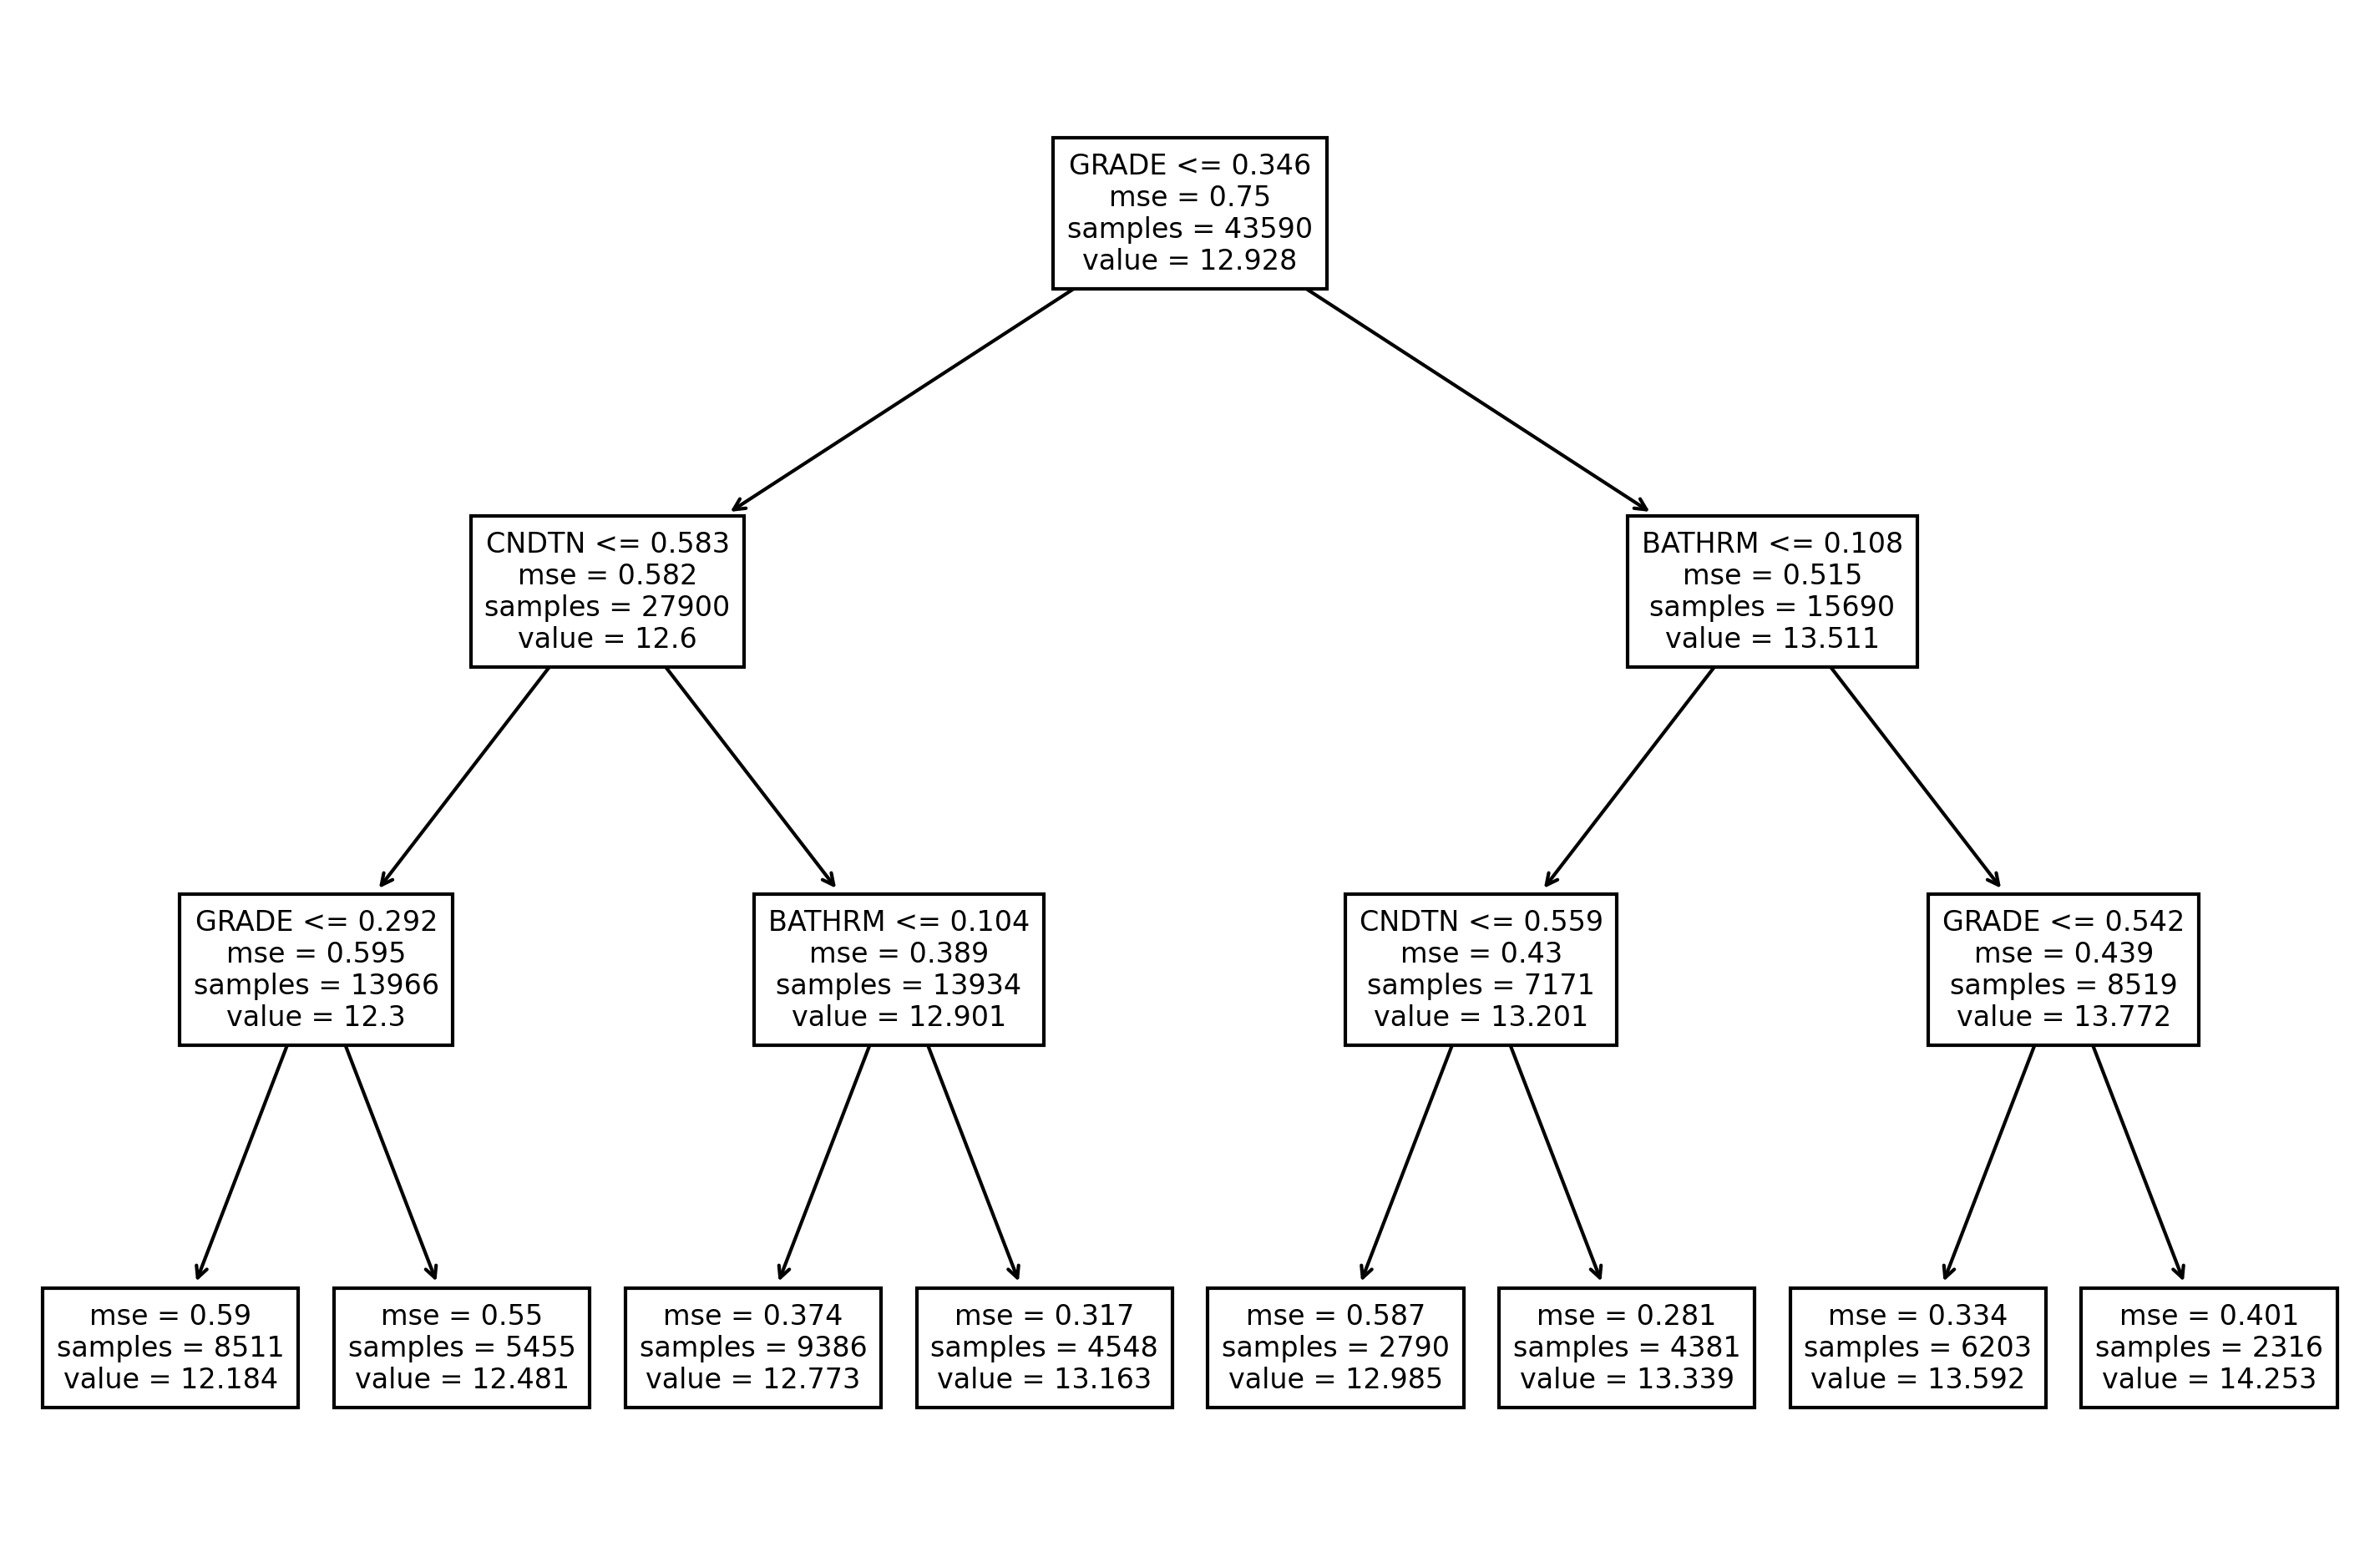

In [133]:
mod = DTree(max_depth=3) # Initialize the modeling object (just as we did)
mod.fit(trainX, trainY) # Fit the mode

# Plot the tree
plt.figure(figsize=(12,8),dpi=300)
rules = tree.plot_tree(mod,feature_names = colNames,fontsize=8)

## Bagging

Note: There is no fine-tunning this bagging method because this method is more of an ensemble approach rather than its own model.

In [136]:
bag_scores = cross_validate(Bag(), trainX, trainY, cv = fold_generator, scoring =use_metrics)
bag_scores

{'fit_time': array([0.92736077, 0.9524684 , 0.8969059 , 1.0385406 , 1.11281037]),
 'score_time': array([0.04439044, 0.03623819, 0.03359938, 0.03641987, 0.04816723]),
 'test_neg_mean_squared_error': array([-0.47069598, -0.50822888, -0.47532867, -0.45827723, -0.44615042])}

## Modeling Pipeline

Into one chunk of hunkalicious code!

Note: Pipeline will clean up our code for us.

In [164]:
# (0) Split the data 
#train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1988)
#trainX = trainData[~]
# Let's grab 8 variables
trainX = trainData[["BATHRM", "HF_BATHRM", "NUM_UNITS", "ROOMS", "BEDRM", "GRADE", "CNDTN", "LANDAREA"]]
testX = testData[["BATHRM", "HF_BATHRM", "NUM_UNITS", "ROOMS", "BEDRM", "GRADE", "CNDTN", "LANDAREA"]]
trainY= trainData[["LN_PRICE"]]
testY = testData[["LN_PRICE"]]

# Replacing all NA values with the column means
trainX = trainX.apply(lambda x: x.fillna(value = x.mean()))
testX = testX.apply(lambda x: x.fillna(value = x.mean()))

# (1) Set the folds index to ensure comparable samples
fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

# (2) Next specify the preprocessing steps
# min-max scale these 3 variables: bathroom, rooms, landArea
# we'll see how to preprocess categorical variables next week: 11/18/2020 November 18
preprocess = ColumnTransformer(transformers=[('num', pp.MinMaxScaler(), trainX.columns)])


# (3) Next Let's create our model pipe (note for the model we leave none as a placeholder)
# spawn a preprocess object
# leave model as blank...cuz we're gonna spawn one eventually...
pipe = Pipeline(steps=[('pre_process', preprocess),
                       ('model',None)])
# fun fact: we don't even have to use the word "model" We could use a random name, like "duck"
# or "P'Dean"

# but please, "model" is a place_holder.
# You change the woird "model" into "P'Dean", you'll have to write "P'Dean"

# (4) Specify the models and their repsective tuning parameters. 
# Note the naming convention here to reference the model key
search_space = [
    # Linear Model
    {'model' : [LM()]},
    
    # KNN with K tuning param
    {'model' : [KNN()],
     'model__n_neighbors':[10,15,20,25,30]}, # Notice the double underscore after model
    
    # Decision Tree with the Max Depth Param
    {'model': [DTree()],
     'model__max_depth':[1,2,3,5]},
    
    # The Bagging decision tree model 
    {'model': [Bag()]},
    
    # Random forest with the N Estimators tuning param
    {'model' : [RF()],
     'model__max_depth':[1,2,3],
     'model__n_estimators':[500,1000,1250]},
]


# (5) Put it all together in the grid search
# search_space was the tuing parameters or something
search = GridSearchCV(pipe, search_space, 
                      cv = fold_generator,
                      scoring='neg_mean_squared_error',
                      n_jobs=4)

# (6) Fit the model to the training data
search.fit(trainX, trainY)

GridSearchCV(cv=KFold(n_splits=5, random_state=111, shuffle=True),
             estimator=Pipeline(steps=[('pre_process',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         Index(['BATHRM', 'HF_BATHRM', 'NUM_UNITS', 'ROOMS', 'BEDRM', 'GRADE', 'CNDTN',
       'LANDAREA'],
      dtype='object'))])),
                                       ('model', None)]),
             n_jobs=4,
             param_grid=[{'model': [LinearRegression()]},
                         {'model': [KNeighborsRegressor(n_neighbors=30)],
                          'model__n_neighbors': [10, 15, 20, 25, 30]},
                         {'model': [DecisionTreeRegressor()],
                          'model__max_depth': [1, 2, 3, 5]},
                         {'model': [BaggingRegressor()]},
                         {'model': [RandomFor

Let's look at the best  score.

In [165]:
search.best_score_ # Mean out-of-sample (CV) error

-0.38470701922889516

Let's look at the best model

In [166]:
search.best_params_

{'model': KNeighborsRegressor(n_neighbors=30), 'model__n_neighbors': 30}

Commentary: So K-Nearest-Neighbors (with 30 neighbors) did the best. That is awesome!

# Test Performance

In [256]:
# Predict() method will use the best model out of the scan
predY = search.predict(testX)
# Make it into a regular np array for easier graphing..
predY = list(chain.from_iterable(predY))
#print(predY)

[12.638935667633934, 12.898256099898495, 14.070973492515732, 13.682958677025317, 12.752185267458325, 13.034767209038396, 14.210347378595854, 12.38348041271268, 13.025152041527887, 12.387499350259707, 13.648410312392247, 12.272412694958785, 11.996035914046708, 12.421543828863099, 13.242683452231764, 12.973139181256071, 13.013975196033044, 12.530769162900448, 13.234566277187977, 12.503789531109437, 12.645088554931387, 13.54161656758479, 11.778684220582509, 14.314092739647242, 12.140982584732123, 13.663193435764589, 13.34963311619895, 13.10827474834011, 13.42270565195675, 13.454228403116511, 14.077302110147969, 12.441056162991732, 14.021724911759694, 12.696880556321512, 13.29772968081819, 13.53844479351584, 11.99304967636143, 12.098732255580659, 12.825518884801683, 11.773786141856274, 12.373950540464806, 12.688094561034834, 12.767321562317395, 13.086320412341697, 12.740509413942172, 12.740706392469013, 13.04253552714354, 13.598405327397547, 11.999263057267882, 13.323639939709292, 12.10083

AttributeError: 'list' object has no attribute 'shape'

In [169]:
m.mean_squared_error(testY, predY) # mean squared error

0.3735934488418163

In [170]:
m.r2_score(testY, predY) # R-squared value

0.49479369755652725

### Visualizing Our Predictions With Actual $ln(Price)$

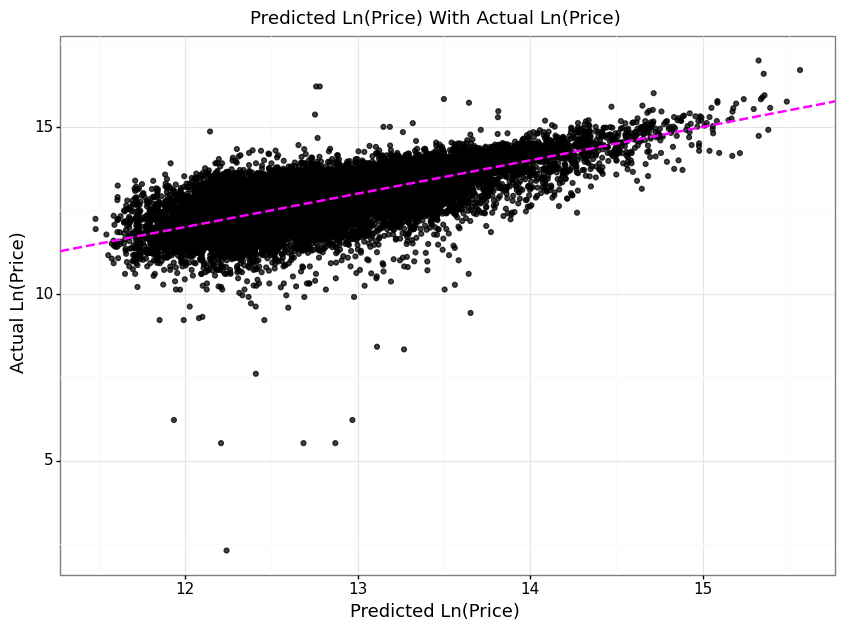

<ggplot: (132669976155)>

In [259]:
myIndex = list(range(len(testY)))
#predY = pd.DataFrame(predY)
(
#     ggplot(pd.DataFrame(dict(
#         pred= predY,
#         truth= testY),
#         index = myIndex),
#         aes(x='pred',y="truth")) +
    ggplot() +
    geom_point(aes(x = predY, y = testY),alpha=.75) +
    geom_abline(linetype="dashed",color="magenta",size=1) +
    labs(
        x = "Predicted Ln(Price)",
        y = "Actual Ln(Price)",
        title = "Predicted Ln(Price) With Actual Ln(Price)") +
    theme_bw() +
    theme(axis_text = element_text(size = 11, color = "black")) +
    theme(axis_title = element_text(size = 13, color = "black")) +
    theme(figure_size=(10,7))
)

Wow we actually did not suck. This looks nice. Our points are clustered around the 45 degree line, which is great.

### Random Forest

In [138]:
rf_scores = cross_validate(RF(),trainX, trainY, cv = fold_generator, scoring =use_metrics)
rf_scores # often takes a while cuz random forest is computationally expensive

{'fit_time': array([ 9.89394259, 10.06362867,  9.69839287,  9.1737349 , 10.1547401 ]),
 'score_time': array([0.39026833, 0.30234313, 0.30829525, 0.32118344, 0.36810088]),
 'test_neg_mean_squared_error': array([-0.44530549, -0.48123253, -0.454844  , -0.4319233 , -0.41694807])}

## Compare Models

In [260]:
# Collect all the metrics we care about as a dictionary 
# multiply by -1 to make everything positive
collect_scores = \
dict(lm = lm_scores['test_neg_mean_squared_error']*-1,
     knn = knn_scores['test_neg_mean_squared_error']*-1,
     dt = dt_scores['test_neg_mean_squared_error']*-1,
     bag = bag_scores['test_neg_mean_squared_error']*-1,
     rf = rf_scores['test_neg_mean_squared_error']*-1)

# Convert to a data frame and reshape it into long dtata
collect_scores = pd.DataFrame(collect_scores).melt(var_name="Model",value_name="MSE")
collect_scores

,Model,MSE
0,lm,NaN
1,lm,0.439100
2,lm,0.417738
3,lm,0.409883
4,lm,0.382727
5,knn,0.429632
6,knn,0.463587
7,knn,0.443646
8,knn,0.421030
9,knn,0.405670


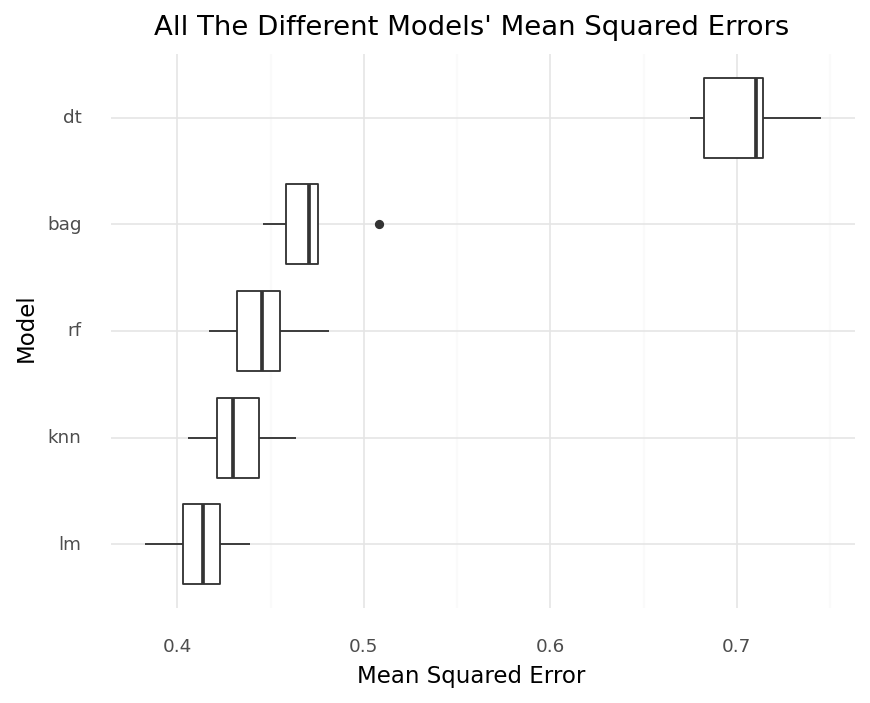

<ggplot: (132670027816)>

In [261]:
# Get the order of the models
order = (collect_scores.groupby('Model').mean().sort_values(by="MSE").index.tolist())

# Plot
(
    ggplot(collect_scores,
          aes(x="Model",y="MSE")) +
    geom_boxplot() +
    scale_x_discrete(limits=order) +
    labs(
        x="Model",
        y="Mean Squared Error",
        title = "All The Different Models' Mean Squared Errors") +
    coord_flip() +
    theme_minimal() +
    theme(dpi=150)
)

Wow. Linear Model actually has the lowest mean squared errors. Decision Tree's mean squared errors are so disgustingly high they are off the charts. As if they didn't care about the mean squared errors and were free to do whatever they wanted to do.

I wish I could experience that sort of high in life.

In [41]:
trainData.loc[:,["EXTWALL", "EXTWALL_D"]]
#trainData.loc[:, ["CNDTN", "CNDTN_D"]]
#trainData["EXTWALL"].describe()
trainData.columns

Index(['OBJECTID', 'SSL', 'BATHRM', 'HF_BATHRM', 'HEAT', 'HEAT_D', 'AC',
       'NUM_UNITS', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES',
       'SALEDATE', 'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE',
       'STYLE_D', 'STRUCT', 'STRUCT_D', 'GRADE', 'GRADE_D', 'CNDTN', 'CNDTN_D',
       'EXTWALL', 'EXTWALL_D', 'ROOF', 'ROOF_D', 'INTWALL', 'INTWALL_D',
       'KITCHENS', 'FIREPLACES', 'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM',
       'LN_PRICE'],
      dtype='object')